# How to load lens models of _El Anzuelo_ exported to the COOLEST format

__author__: @aymgal

__last update__: 18/06/24

In [1]:
import os
from pprint import pprint
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, Normalize
plt.rc('image', interpolation='none', origin='lower')

from coolest.api.util import get_coolest_object

In [2]:
# choose which filter to load
NIRCAM_FILTER = 'F200W'  # F150W, F200W, F277W, F356W, F410M, F444W

# choose which type of model
MODEL_NAME = 'Cluster+Shear'  # or 'Cluster+Shear_(300x300)' which corresponds to higher-res source

# the directory containing the COOLEST template and auxillary files (e.g., .fits)
coolest_template = os.path.join(
    f"coolest-elanzuelo-herculens-{MODEL_NAME}",
    f"{NIRCAM_FILTER}",
    f"coolest-herculens_model_{NIRCAM_FILTER}",  # without the .json extension
)
coolest_dir = os.path.dirname(coolest_template)

In [3]:
# Load the COOLEST python object
coolest_obj = get_coolest_object(
    coolest_template,
    verbose=True,  # prints useful checks
    check_external_files=True,  # checks that all auxillary files are in the coolest directory 
)

Template file '/Users/aymgal/Science/Astro/Lens_modeling/ElAnzuelo_modeling/public_repository/ElAnzuelo_modeling_public/lens_models/coolest-elanzuelo-herculens-Cluster+Shear/F200W/coolest-herculens_model_F200W_pyAPI.json' not found, now trying to read '/Users/aymgal/Science/Astro/Lens_modeling/ElAnzuelo_modeling/public_repository/ElAnzuelo_modeling_public/lens_models/coolest-elanzuelo-herculens-Cluster+Shear/F200W/coolest-herculens_model_F200W.json'.


/Users/aymgal/Science/packages/my_packages/coolest/coolest/template/classes/grid.py:153: UserWarning: Image dimensions do not match the FITS header
  warnings.warn("Image dimensions do not match the FITS header")


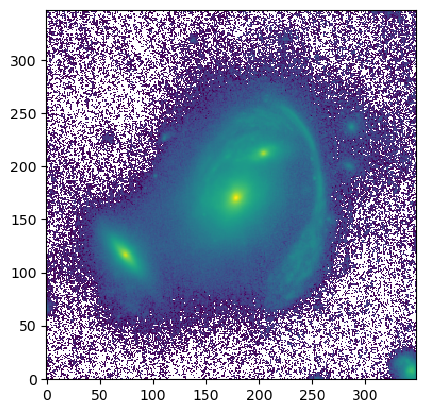

In [4]:
# access any attribute simply
data_pixels = coolest_obj.observation.pixels.get_pixels()

plt.imshow(data_pixels, norm=LogNorm(1e-3))
plt.show()

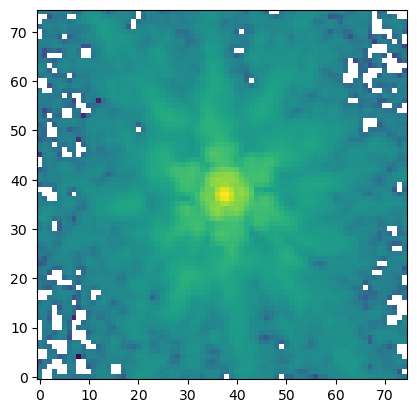

In [5]:
# access any attribute simply
psf_pixels = coolest_obj.instrument.psf.pixels.get_pixels()

plt.imshow(psf_pixels, norm=LogNorm())
plt.show()

In [6]:
# access some model parameters
parameters_L1 = coolest_obj.lensing_entities[0]

pprint(parameters_L1)
pprint(parameters_L1.mass_model)
pprint(parameters_L1.mass_model[0].parameters)
print("Best-fit density slope for L1 =", parameters_L1.mass_model[0].parameters['gamma'].point_estimate.value)

{'center_x': <coolest.template.classes.parameter.NonLinearParameter object at 0x129638dd0>,
 'center_y': <coolest.template.classes.parameter.NonLinearParameter object at 0x129638f10>,
 'gamma': <coolest.template.classes.parameter.NonLinearParameter object at 0x1296387d0>,
 'phi': <coolest.template.classes.parameter.NonLinearParameter object at 0x129638c90>,
 'q': <coolest.template.classes.parameter.NonLinearParameter object at 0x129638b50>,
 'theta_E': <coolest.template.classes.parameter.NonLinearParameter object at 0x129638a10>}
Best-fit density slope for L1 = 2.2168795411462634


In [7]:
# etc.... :) 

# For more information about the content of a COOLEST instance, see https://coolest.readthedocs.io/